# Part A

### 1. How many orders were completed in 2018? (Note: We operate in US/Eastern time zone)

## 9227

### 2. How many orders were completed in 2018 containing at least 10 units?

## 1092

### 3. How many customers have ever purchased a medium sized sweater with a discount?

## 753

### 4. How profitable was our most profitable month? (Profit = Revenue - Cost)

| profit | month | year |
|--- | --- | --- |
| 92622.25999999889 | 10 | 2020 |


###### Did not add the shipping revenue/costs

### 5. What is the return rate for business vs. non-business customers?

#### Percentages of each category grouping of business type / returned:

| is_business | returned | precent_returned |
|--- | --- | --- |
| False | False | 37.42596859991816 |
| False | True | 1.93827665668813 |
| True | False | 56.54599099778175 |
| True | True | 4.08976374561196 |

#### Percentages of businessees if 'returned' is True:

| is_business | returned | precent_returned |
|--- | --- | --- |
| False | True | 32.15434083601286 |
| True | True | 67.84565916398714 |

# Part B

In [1]:
import sqlite3
import pandas as pd

In [2]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect(r"C:\Users\Nathan\Documents\Data\jiffy_test\jiffy.db")

cur = con.cursor()

# The result of a "cursor.execute" can be iterated over by row
customers_df = pd.read_sql_query("SELECT * FROM customers", con)
line_items_df = pd.read_sql_query("SELECT * FROM line_items", con)
orders_df = pd.read_sql_query("SELECT * FROM orders", con)

# Be sure to close the connection
con.close()

In [3]:
customers_df.head()

,customer_uid,is_business,has_account,bill_state,acquisition_channel
0,7d30104b82c22393003ac3c07b491c15,False,False,OK,coupon aggregator
1,77a48e4c4a69458d3421c54058350f93,False,False,CA,organic search
2,c9fe0dadc9e25ab478144bbd3a0ae750,False,False,WA,organic search
3,7a8bdb597d753c6c7430ea4e1d52fc48,False,False,TX,organic search
4,becb1413c375caba8707085efaac08e9,False,False,IL,organic search


In [4]:
line_items_df.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size
0,1000026281,28714,1,4.08,2.12,OTHER,COLOR,OTHER
1,1000034420,37537,1,10.51,4.51,Sweater,GRAY,XL
2,1000034421,37537,1,10.85,5.33,Sweater,GRAY,XL
3,1000034422,37537,1,10.51,4.51,Sweater,GRAY,XL
4,1000040930,20008,1,13.61,8.11,Sweater,BLUE,M


In [5]:
orders_df.head()

,order_id,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned
0,817,23b0844d1e9419787212fe81a4a6796a,2015-12-19 19:29:58.391,0.00,VA,0.00,6.8,False
1,1533,33cfcf2abb8ed4847c0f5e4ca51cc3c8,2015-12-02 22:28:16.071,0.00,WA,7.95,6.8,False
2,2589,c7d0bd76e6fb1ca84141eabeb5408fad,2016-01-12 23:05:13.955,0.04,TX,0.00,6.8,False
3,3461,10cedfe0d36280b646ff877ac1d916cb,2015-11-25 19:36:48.114,0.00,OH,0.00,6.8,False
4,3701,23b0844d1e9419787212fe81a4a6796a,2016-03-31 15:12:24.976,0.00,VA,0.00,6.8,False


In [6]:
#merge dfs
full_df1 = pd.merge(
    left=line_items_df,
    right=orders_df,
    left_on='order_id',
    right_on='order_id',
    how='left'
)

In [7]:
full_df2 = pd.merge(
    left=full_df1,
    right=customers_df,
    left_on='customer_uid',
    right_on='customer_uid',
    how='left'
)

In [8]:
full_df2.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned,is_business,has_account,bill_state,acquisition_channel
0,1000026281,28714,1,4.08,2.12,OTHER,COLOR,OTHER,090e05df6d9fce97564c16ff105a276b,2015-11-29 02:17:48.534,0.000,VA,5.95,6.8,False,False,True,VA,direct
1,1000034420,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,0.000,IL,5.95,6.8,False,True,False,IL,organic search
2,1000034421,37537,1,10.85,5.33,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,0.000,IL,5.95,6.8,False,True,False,IL,organic search
3,1000034422,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,0.000,IL,5.95,6.8,False,True,False,IL,organic search
4,1000040930,20008,1,13.61,8.11,Sweater,BLUE,M,d5bfd56123d3bef24dfc2a1d7e03f4ab,2015-12-01 02:19:33.055,0.075,MN,0.00,6.8,False,True,True,MN,paid search


In [9]:
full_df2.shape

(373848, 19)

In [10]:
full_df2.dtypes

line_item_id             int64
order_id                 int64
quantity                 int64
selling_price           object
supplier_cost           object
product_category        object
color                   object
size                    object
customer_uid            object
order_timestamp         object
discount               float64
ship_state              object
shipping_revenue       float64
shipping_cost          float64
returned                object
is_business             object
has_account             object
bill_state              object
acquisition_channel     object
dtype: object

In [11]:
#replace datatypes
full_df2["selling_price"] = pd.to_numeric(full_df2["selling_price"])
full_df2["supplier_cost"] = pd.to_numeric(full_df2["supplier_cost"])
full_df2["order_timestamp"] = pd.to_datetime(full_df2["order_timestamp"])

In [12]:
full_df2.dtypes

line_item_id                    int64
order_id                        int64
quantity                        int64
selling_price                 float64
supplier_cost                 float64
product_category               object
color                          object
size                           object
customer_uid                   object
order_timestamp        datetime64[ns]
discount                      float64
ship_state                     object
shipping_revenue              float64
shipping_cost                 float64
returned                       object
is_business                    object
has_account                    object
bill_state                     object
acquisition_channel            object
dtype: object

In [13]:
full_df2['revenue'] = full_df2['quantity']*full_df2['selling_price']
full_df2['cost'] = full_df2['quantity']*full_df2['supplier_cost']
full_df2['profit'] = full_df2['revenue']-full_df2['cost']

In [14]:
full_df2.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,customer_uid,order_timestamp,...,shipping_revenue,shipping_cost,returned,is_business,has_account,bill_state,acquisition_channel,revenue,cost,profit
0,1000026281,28714,1,4.08,2.12,OTHER,COLOR,OTHER,090e05df6d9fce97564c16ff105a276b,2015-11-29 02:17:48.534,...,5.95,6.8,False,False,True,VA,direct,4.08,2.12,1.96
1,1000034420,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,5.95,6.8,False,True,False,IL,organic search,10.51,4.51,6.00
2,1000034421,37537,1,10.85,5.33,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,5.95,6.8,False,True,False,IL,organic search,10.85,5.33,5.52
3,1000034422,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,5.95,6.8,False,True,False,IL,organic search,10.51,4.51,6.00
4,1000040930,20008,1,13.61,8.11,Sweater,BLUE,M,d5bfd56123d3bef24dfc2a1d7e03f4ab,2015-12-01 02:19:33.055,...,0.00,6.8,False,True,True,MN,paid search,13.61,8.11,5.50


In [15]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [16]:
#extract year from timestamp
full_df2['year'] = pd.DatetimeIndex(full_df2['order_timestamp']).year
full_df2.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,customer_uid,order_timestamp,...,shipping_cost,returned,is_business,has_account,bill_state,acquisition_channel,revenue,cost,profit,year
0,1000026281,28714,1,4.08,2.12,OTHER,COLOR,OTHER,090e05df6d9fce97564c16ff105a276b,2015-11-29 02:17:48.534,...,6.8,False,False,True,VA,direct,4.08,2.12,1.96,2015
1,1000034420,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,6.8,False,True,False,IL,organic search,10.51,4.51,6.00,2015
2,1000034421,37537,1,10.85,5.33,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,6.8,False,True,False,IL,organic search,10.85,5.33,5.52,2015
3,1000034422,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,6.8,False,True,False,IL,organic search,10.51,4.51,6.00,2015
4,1000040930,20008,1,13.61,8.11,Sweater,BLUE,M,d5bfd56123d3bef24dfc2a1d7e03f4ab,2015-12-01 02:19:33.055,...,6.8,False,True,True,MN,paid search,13.61,8.11,5.50,2015


In [17]:
#groupby year, take sum
yr_df=full_df2.groupby(['year'],as_index=False).sum()
yr_df.head()

,year,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit
0,2015,5895180445861,133289437,2705,8318.73,4409.50,37.628,1847.6,7316.800000,16591.52,8918.86,7672.66
1,2016,101324435643150,31086880156,54902,114146.33,62870.62,749.167,25121.0,128353.520000,273557.84,152667.01,120894.68
2,2017,227210966794070,231506576027,104916,270977.84,148601.85,1609.611,49698.7,303104.590000,563285.14,313684.82,249600.32
3,2018,406481756894704,824181020201,177914,467925.79,260676.15,3303.103,79562.7,554147.220001,958442.68,540310.96,418131.72
4,2019,828776454072428,1973726891000,223289,615343.92,346833.91,4175.124,125472.3,808279.490000,1226372.76,699958.71,526414.05


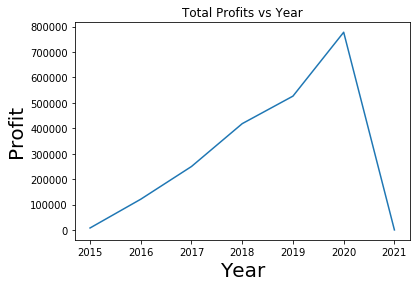

In [18]:
sns.lineplot(y="profit", x="year", data=yr_df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Total Profits vs Year")
plt.show()

In [19]:
#groupby year, take mean
yr_avg_df=full_df2.groupby(['year'],as_index=False).mean()
yr_avg_df.head()

,year,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit
0,2015,5.349529e+09,1.209523e+05,2.454628,7.548757,4.001361,0.034145,1.676588,6.639564,15.055826,8.093339,6.962486
1,2016,5.405411e+09,1.658409e+06,2.928888,6.091703,3.355068,0.039966,1.340144,6.847347,14.599095,8.147020,6.451845
2,2017,5.294318e+09,5.394412e+06,2.444683,6.314586,3.462863,0.037506,1.158046,7.062741,13.126212,7.309785,5.816427
3,2018,5.477453e+09,1.110606e+07,2.397440,6.305938,3.512966,0.044510,1.072129,7.467285,12.916321,7.281426,5.634895
4,2019,8.567228e+09,2.040281e+07,2.308183,6.360933,3.585291,0.043159,1.297032,8.355346,12.677260,7.235613,5.441647


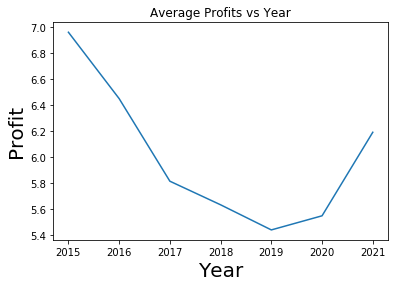

In [20]:
sns.lineplot(y="profit", x="year", data=yr_avg_df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Average Profits vs Year")
plt.show()

In [21]:
order_df = full_df2.groupby('year')['order_id'].nunique()

In [22]:
order_df

year
2015      187
2016     2484
2017     5230
2018     9227
2019    12772
2020    16531
2021        1
Name: order_id, dtype: int64

In [23]:
order_df = full_df2.groupby(by='year', as_index=False).agg({'order_id': pd.Series.nunique})
order_df

,year,order_id
0,2015,187
1,2016,2484
2,2017,5230
3,2018,9227
4,2019,12772
5,2020,16531
6,2021,1


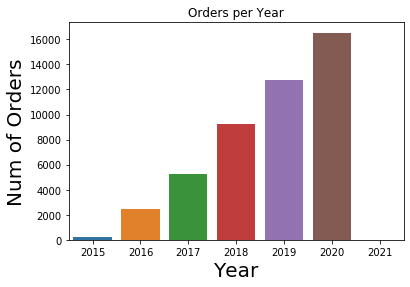

In [24]:
sns.barplot(y="order_id", x="year", data=order_df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Num of Orders",fontsize=20)
plt.title("Orders per Year")
plt.show()

In [25]:
#groupby year & is_business, take sum
cust_df=full_df2.groupby(['year','is_business'],as_index=False).sum()
cust_df.head()

,year,is_business,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit
0,2015,False,2423091554214,67737106,1378,3791.80,2011.72,16.334,1084.55,3440.80,8650.51,4558.65,4091.86
1,2015,True,3472088891647,65552331,1327,4526.93,2397.78,21.294,763.05,3876.00,7941.01,4360.21,3580.80
2,2016,False,43156875738069,13672845599,20414,51296.91,27768.02,265.164,14133.70,56284.79,105166.89,57377.05,47789.84
3,2016,True,58167559905081,17414034557,34488,62849.42,35102.60,484.003,10987.30,72068.73,168390.95,95289.96,73104.84
4,2017,False,84187830688202,83501939185,34347,100070.47,53921.11,513.488,20676.15,109866.64,188510.00,102435.08,86074.92


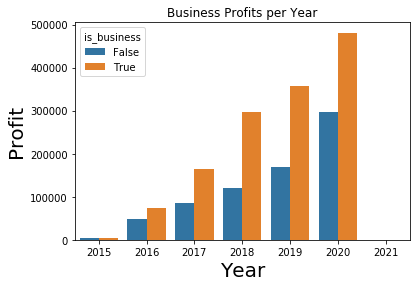

In [26]:
sns.barplot(y="profit", x="year",hue="is_business",data=cust_df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Business Profits per Year")
plt.show()

In [27]:
bus_df=full_df2.groupby(['is_business'],as_index=False).sum()
bus_df['percent'] = (bus_df['profit'] / bus_df['profit'].sum()) * 100
bus_df[['is_business','profit','percent']]

,is_business,profit,percent
0,False,723659.90,34.452069
1,True,1376823.26,65.547931


In [28]:
#extract month from timestamp
full_df2['month'] = pd.DatetimeIndex(full_df2['order_timestamp']).month
full_df2.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,customer_uid,order_timestamp,...,returned,is_business,has_account,bill_state,acquisition_channel,revenue,cost,profit,year,month
0,1000026281,28714,1,4.08,2.12,OTHER,COLOR,OTHER,090e05df6d9fce97564c16ff105a276b,2015-11-29 02:17:48.534,...,False,False,True,VA,direct,4.08,2.12,1.96,2015,11
1,1000034420,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,False,True,False,IL,organic search,10.51,4.51,6.00,2015,11
2,1000034421,37537,1,10.85,5.33,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,False,True,False,IL,organic search,10.85,5.33,5.52,2015,11
3,1000034422,37537,1,10.51,4.51,Sweater,GRAY,XL,a537232c24b13c0b7416fd919385921d,2015-11-30 01:56:20.005,...,False,True,False,IL,organic search,10.51,4.51,6.00,2015,11
4,1000040930,20008,1,13.61,8.11,Sweater,BLUE,M,d5bfd56123d3bef24dfc2a1d7e03f4ab,2015-12-01 02:19:33.055,...,False,True,True,MN,paid search,13.61,8.11,5.50,2015,12


In [29]:
#groupby year & month, take sum
mn_df=full_df2.groupby(['year','month'],as_index=False).sum()
mn_df.head()

,year,month,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit
0,2015,11,592003317134,3435370,292,787.74,406.27,3.680,194.55,727.6,1543.95,865.39,678.56
1,2015,12,5303177128727,129854067,2413,7530.99,4003.23,33.948,1653.05,6589.2,15047.57,8053.47,6994.10
2,2016,1,4656383460547,274403507,3303,5995.07,3175.31,45.845,1142.10,4896.0,15376.81,8225.16,7151.65
3,2016,2,7424004670665,687558428,4441,8513.00,4702.14,60.188,2196.75,9737.6,21474.09,11941.64,9532.45
4,2016,3,8134510004178,1026932852,4841,8379.29,4628.21,49.391,2633.70,9520.0,24848.91,13653.42,11195.49


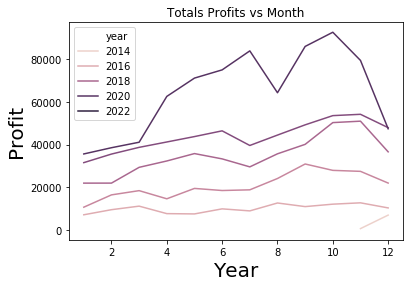

In [30]:
sns.lineplot(y="profit", x="month", hue="year",data=mn_df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Totals Profits vs Month")
plt.show()

In [31]:
#groupby size & month, take sum
size_mn_df=full_df2.groupby(['size','month'],as_index=False).sum()
size_mn_df.head()

,size,month,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,year
0,2XL,1,11215627344254,23732272865,2765,13257.18,7088.40,54.816,1977.28,11268.64,23090.84,12473.22,10617.62,2876914
1,2XL,2,14575639153007,29817877464,3743,16934.64,9244.20,73.413,2823.85,14760.21,30283.93,16656.67,13627.26,3805300
2,2XL,3,18973805032795,35494478721,4456,19046.80,10510.76,86.661,2985.40,18011.50,34151.39,19036.09,15115.30,4636717
3,2XL,4,24595996235891,48846797898,5345,21842.23,12119.71,99.109,3865.90,22150.11,38669.49,21716.26,16953.23,5674723
4,2XL,5,40628737580149,66966563447,6461,25178.04,13864.07,127.785,4285.10,26397.72,46750.75,25739.11,21011.64,6650492


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


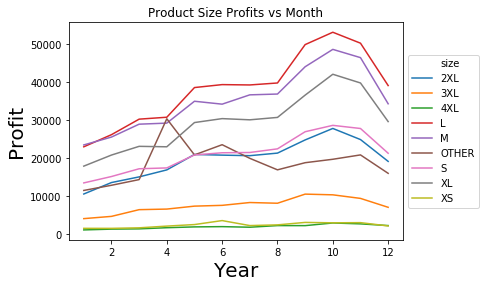

In [32]:
sns.lineplot(y="profit", x="month", hue="size",data=size_mn_df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Profit",fontsize=20)
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Product Size Profits vs Month")
plt.show()

In [33]:
#groupby year & size, take sum
size_df=full_df2.groupby(['year','size'],as_index=False).sum()
size_df.head()

,year,size,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,month
0,2015,2XL,443014391598,10374183,151,847.38,429.71,2.945,121.15,564.4,1318.98,679.75,639.23,1024
1,2015,3XL,226006655128,4842397,51,547.27,267.65,1.652,55.65,265.2,640.04,313.26,326.78,509
2,2015,4XL,68002295169,1497371,25,145.84,84.18,0.298,15.90,108.8,232.67,134.96,97.71,192
3,2015,L,1213037715559,27911338,591,1617.10,884.65,7.209,385.35,1516.4,3377.44,1864.24,1513.20,2722
4,2015,M,1268037183271,27969131,616,1707.35,914.41,8.004,423.15,1570.8,3584.60,1966.79,1617.81,2806


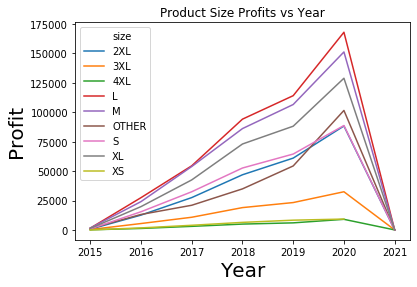

In [34]:
sns.lineplot(y="profit", x="year", hue="size",data=size_df,)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Product Size Profits vs Year")
plt.show()

In [35]:
#groupby ship_state & year, take sum
bill_st_df=full_df2.groupby(['ship_state','year'],as_index=False).sum()
bill_st_df.head()

,ship_state,year,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,month
0,AL,2015,654017214919,12167158,186,922.35,497.75,4.620,0.00,775.20,1255.75,689.97,565.78,1350
1,AL,2016,11858979491874,3404262452,6045,12621.00,6810.03,118.558,1489.85,14498.76,29381.90,16281.23,13100.67,14682
2,AL,2017,13583702262725,13445029376,5459,15334.77,8014.09,69.320,2284.25,18242.57,29163.10,15299.58,13863.52,17055
3,AL,2018,19791658501669,37790814747,7348,20384.52,10994.10,141.536,1877.40,25706.17,37446.39,20337.71,17108.68,23963
4,AL,2019,23110217945194,56161479226,6498,16445.98,8938.36,118.180,4033.85,23114.50,35597.34,19623.54,15973.80,18890


In [36]:
#sort by profit, grab top 20 states by year
bill_st_df = bill_st_df.sort_values(by=['profit'])

In [37]:
bill_st_df

,ship_state,year,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,month
192,OK,2015,9000327007,273015,12,3.27,1.70,0.000,7.95,6.80,39.24,20.40,18.84,12
214,SC,2015,34001158823,923500,10,28.40,11.84,0.000,37.75,34.00,39.95,19.69,20.26,60
220,SD,2015,36000579444,423496,12,45.35,24.02,0.000,79.50,68.00,50.45,27.56,22.89,112
210,RI,2017,29050666319,25455328,7,35.74,17.46,0.000,27.80,28.36,50.04,25.71,24.33,38
249,VT,2016,7004336516,2497174,22,2.86,1.70,0.000,0.00,7.09,62.92,37.40,25.52,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,GA,2020,207270414409000,489408876793,19887,59777.70,34256.24,424.369,20479.45,89765.07,115027.49,64914.73,50112.76,67171
191,OH,2020,166491488644469,468186075829,22217,66898.34,37250.86,548.132,16068.04,87960.59,133600.15,76136.83,57463.32,65051
236,TX,2019,123725700434001,237831424407,25092,69531.54,40005.31,415.297,19351.05,98764.76,137584.37,79318.15,58266.22,78830
21,CA,2020,163677260577451,363311848065,21690,49378.04,26927.87,327.400,12744.40,65459.69,143430.83,81247.59,62183.24,49528


In [38]:
bill_st_df = bill_st_df.tail(20)

In [39]:
bill_st_df

,ship_state,year,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,month
126,MO,2020,93255418152404,243161701838,8666,33608.00,19003.13,245.817,9098.84,49107.90,51984.25,29290.12,22694.13,33549
19,CA,2018,13401728925407,45839292634,7865,27043.33,14609.27,165.409,4820.05,30442.95,49088.85,26284.82,22804.03,29197
189,OH,2018,20351028101343,52439160806,10383,29988.93,16708.01,250.959,2787.25,34002.04,57490.14,32778.50,24711.64,35059
248,VA,2020,99400320215040,232305359900,11023,29929.25,16503.39,198.037,10372.97,41377.50,58961.39,33909.14,25052.25,32287
184,NY,2019,32683131903238,74408488358,10940,24771.48,13823.52,177.253,4446.45,29306.48,62767.36,35761.11,27006.25,26785
42,FL,2019,40146510639557,113668979323,14155,32172.98,18214.97,240.894,6899.10,46467.34,70409.94,40408.13,30001.81,37963
20,CA,2019,57394697568510,118634467323,12423,38289.79,21193.27,223.137,5759.05,49753.41,70867.18,39903.54,30963.64,38314
67,IL,2020,77774981193793,251219852955,11663,34419.35,19209.08,236.105,10864.47,46521.70,70498.03,39533.11,30964.92,34832
48,GA,2019,48699835208741,123210737221,14693,36365.20,20636.97,244.091,9373.80,49536.60,75466.10,43861.65,31604.45,40825
190,OH,2019,44321076846178,141637532508,16803,45881.17,25899.56,373.877,6686.55,56521.50,91869.47,52562.71,39306.76,47747


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


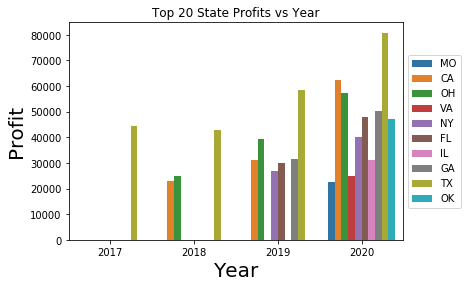

In [40]:
sns.barplot(y="profit", x="year",hue="ship_state",data=bill_st_df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Profit",fontsize=20)
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Top 20 State Profits vs Year")
plt.show()

In [41]:
#groupby product_category & year, take sum
pc_df=full_df2.groupby(['product_category','year'],as_index=False).sum()
pc_df.head()

,product_category,year,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,month
0,Basic Tee,2015,1834050789577,38836844,1179,1265.59,761.55,11.881,675.35,2366.40,3742.27,2284.12,1458.15,4148
1,Basic Tee,2016,38388300278378,10541312478,26575,23809.57,14317.97,284.525,9130.40,46094.80,82365.00,50583.56,31781.44,45444
2,Basic Tee,2017,71680959614323,68757446558,44561,46796.05,28241.44,488.670,15899.15,91319.20,141336.91,87617.84,53719.07,91554
3,Basic Tee,2018,116211640905379,225301130308,71717,75607.76,45493.85,856.026,24266.10,153386.38,233935.98,143705.46,90230.52,139998
4,Basic Tee,2019,213722580236277,504622984463,85764,90879.69,55084.24,1074.679,35737.10,209031.86,278529.45,172882.30,105647.15,163836


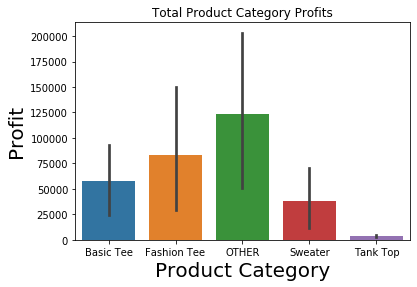

In [42]:
sns.barplot(y="profit", x="product_category",data=pc_df)
plt.xlabel("Product Category",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Total Product Category Profits")
plt.show()

In [43]:
pc_mn_df=full_df2.groupby(['product_category','month'],as_index=False).sum()
pc_mn_df.head()

,product_category,month,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,year
0,Basic Tee,1,32633869842848,62843057102,15734,14724.89,8949.52,164.034,6810.03,32950.27,48215.15,29931.03,18284.12,8561113
1,Basic Tee,2,43325926150049,80413894059,19280,20559.53,12280.53,239.480,8214.35,43788.56,63110.79,38514.89,24595.90,11374412
2,Basic Tee,3,62468393817650,105178508237,23730,26428.60,16101.18,271.419,9683.55,56564.80,77273.80,47988.92,29284.88,14875974
3,Basic Tee,4,82885272022040,144641157908,28201,30896.18,18812.61,292.699,12282.60,64893.86,91754.14,57177.80,34576.34,17100380
4,Basic Tee,5,125462448078803,190584059364,34695,36745.85,22333.26,371.422,14422.80,79947.98,110095.19,68488.38,41606.81,20688320


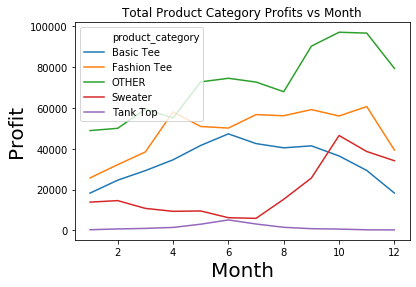

In [44]:
sns.lineplot(y="profit", x="month",hue='product_category',data=pc_mn_df)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Total Product Category Profits vs Month")
plt.show()

In [45]:
pc_avg_df=full_df2.groupby(['product_category','month'],as_index=False).mean()
pc_avg_df.head()

,product_category,month,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,revenue,cost,profit,year
0,Basic Tee,1,7.694853e+09,1.481798e+07,3.709974,3.472033,2.110238,0.038678,1.605760,7.769458,11.368816,7.057541,4.311276,2018.654327
1,Basic Tee,2,7.688718e+09,1.427043e+07,3.421473,3.648541,2.179331,0.042499,1.457737,7.770818,11.199785,6.834941,4.364845,2018.529193
2,Basic Tee,3,8.476037e+09,1.427117e+07,3.219810,3.585970,2.184692,0.036828,1.313915,7.675007,10.484912,6.511387,3.973525,2018.449661
3,Basic Tee,4,9.784591e+09,1.707486e+07,3.329123,3.647288,2.220825,0.034553,1.449959,7.660708,10.831559,6.749829,4.081731,2018.696730
4,Basic Tee,5,1.224263e+10,1.859720e+07,3.385539,3.585661,2.179280,0.036243,1.407377,7.801325,10.743090,6.683097,4.059993,2018.766589


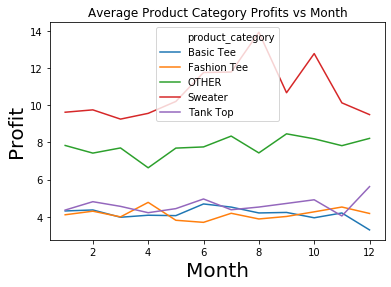

In [46]:
sns.lineplot(y="profit", x="month",hue='product_category',data=pc_avg_df)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Average Product Category Profits vs Month")
plt.show()

# Conclusion

* #### Although the average profits dropped with time until 2020, the sum of profits increased with time

* #### This suggests the profits increased from the volume of more orders, while the average profit per order decreased.

* #### Businesses drove most of the business, raking in 65.55% of the profits. Whilenon-businesses brought in 34.55% of profits. 

* #### Seasonal trends aren't as pronounced, but there does appear to be a gradual incline in business from early January to Late summer, and then increases very slightly as we hit the fall months. 

* #### Large, medium and small sized product sizes are the top selling sizes.

* #### The 'OTHER' and 'Fashion Tee' lead the product category in profts. 

* #### 'Sweaters' have an uptick in profits in the winter months, while 'Tank Tops' have a slight uptick in profit in the summer months. 

* #### 'Sweaters' and the 'OTHER' categories have the highest average profits across all months.

* #### Only 10 states cover the 20 highest profiting states (by year). Half of the top 20 profiting years by state took place in 2020. 


In [47]:
bill_st_df['ship_state'].value_counts().to_frame('counts')

,counts
TX,4
CA,3
OH,3
FL,2
NY,2
GA,2
MO,1
OK,1
IL,1
VA,1
